1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
pp.ProfileReport(df)

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
X = df.drop('target', axis=1)

In [12]:
y = df.target

In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_pred = knn.predict(X_test_scaled)

In [22]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        42
           1       0.82      0.76      0.79        49

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



<AxesSubplot:>

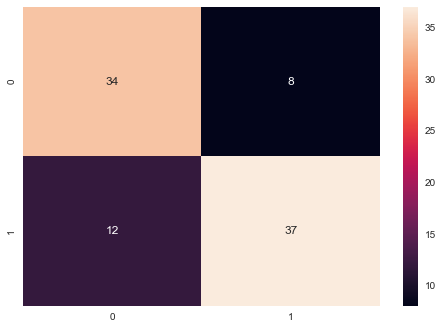

In [23]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)

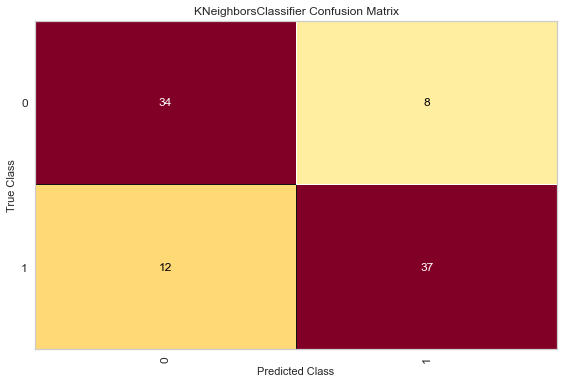

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [25]:
error_rate = []# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

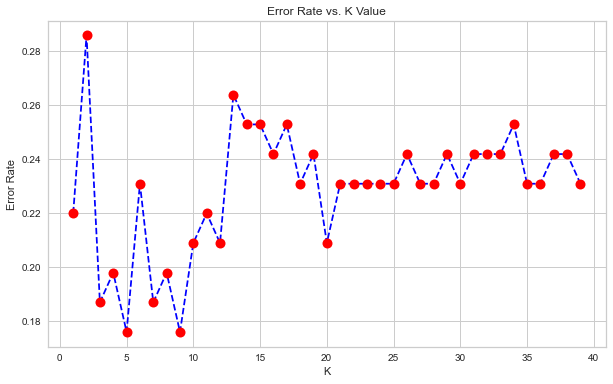

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [29]:
knn_pred = knn.predict(X_test_scaled)

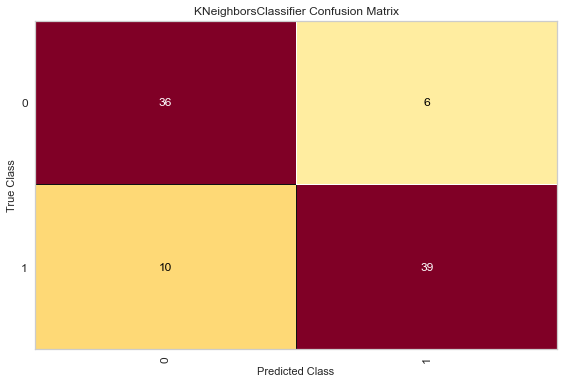

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [30]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [31]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.87      0.80      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



In [32]:
grid_params = {'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1, 2], 'leaf_size': [20, 25, 30, 35, 40, 45]}

In [33]:
cv = GridSearchCV(KNeighborsClassifier(n_neighbors=5, n_jobs=-1), param_grid=grid_params, n_jobs=-1, verbose=3, scoring='recall')

In [34]:
cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    1.0s finished


GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35, 40, 45], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=3)

In [35]:
cv.best_score_

0.8521739130434781

In [36]:
cv.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'p': 1, 'weights': 'uniform'}

In [37]:
knn = KNeighborsClassifier(n_neighbors=5, leaf_size=20, p=1, weights='distance', n_jobs=-1)

In [38]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=20, n_jobs=-1, p=1, weights='distance')

In [39]:
knn_pred = knn.predict(X_test_scaled)

In [40]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.87      0.82      0.84        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



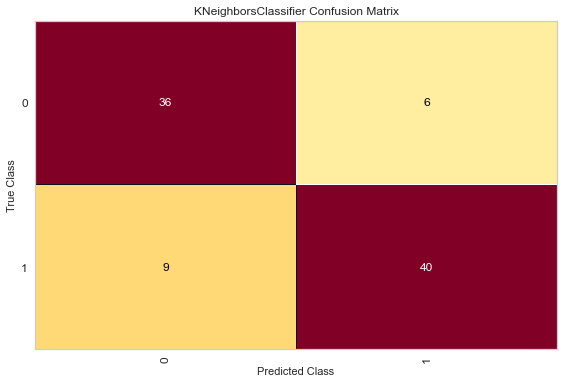

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

# Logistic Regression

In [42]:
log_model = LogisticRegression(random_state=42, n_jobs=-1)

In [43]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [44]:
log_pred = log_model.predict(X_test_scaled)

In [45]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.87      0.82      0.84        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



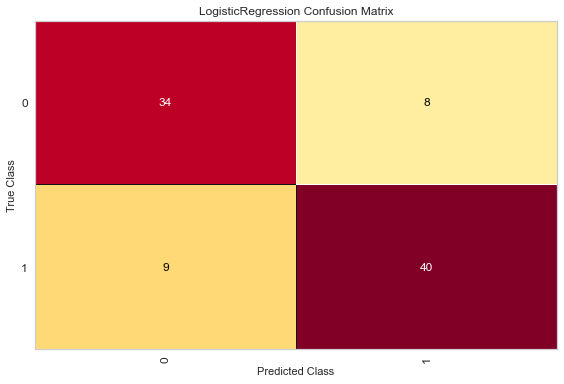

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

# SVClassifier

In [47]:
sv_model = SVC(random_state=42)

In [48]:
sv_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [49]:
sv_pred = sv_model.predict(X_test_scaled)

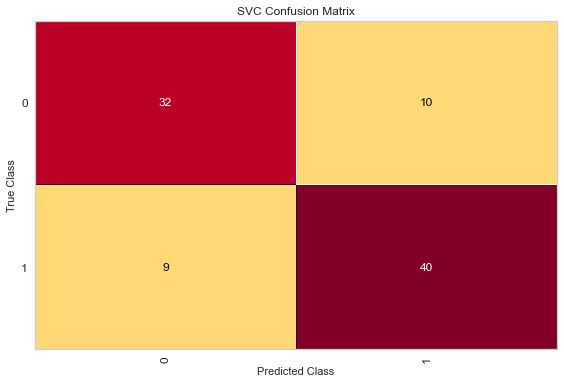

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [50]:
cm = ConfusionMatrix(sv_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [51]:
grid_param = {'C':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [1, 2, 3, 4],
             'gamma':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 'scale', 'auto'],
             'random_state':[42]}

In [52]:
cv = GridSearchCV(SVC(random_state=42), param_grid=grid_param, n_jobs=-1, scoring='recall')

In [53]:
cv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3,
                                   'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42]},
             scoring='recall')

In [54]:
cv.best_score_

1.0

In [55]:
cv.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

In [56]:
sv_pred = cv.predict(X_test_scaled)

In [57]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        42
           1       0.55      1.00      0.71        49

    accuracy                           0.56        91
   macro avg       0.78      0.52      0.40        91
weighted avg       0.76      0.56      0.42        91



# Decision Tree

In [58]:
tree_model = DecisionTreeClassifier(random_state=42)

In [59]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
tree_pred = tree_model.predict(X_test)

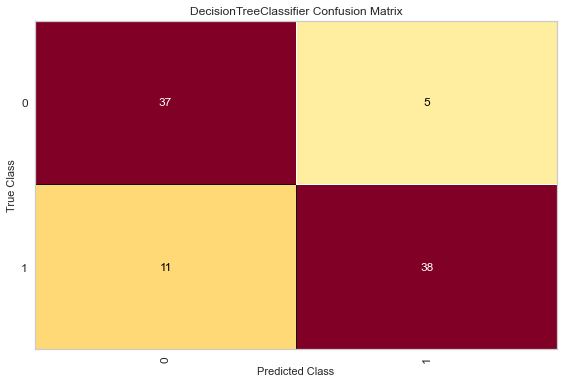

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
cm = ConfusionMatrix(tree_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [62]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        42
           1       0.88      0.78      0.83        49

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



In [63]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(2, 20)
}

In [64]:
cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_dict,
                 cv=10, verbose=3, n_jobs=-1, scoring='recall')

In [65]:
cv.fit(X_train, y_train)

Fitting 10 folds for each of 11664 candidates, totalling 116640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 5352 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 12520 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 21736 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 33000 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 46312 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 61672 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 79080 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 98536 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 116560 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 116640 out of 116640 | elapsed:  1.4min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(2, 20)},
             scoring='recall', verbose=3)

In [66]:
cv.best_score_

0.8787878787878787

In [67]:
tree_pred = cv.predict(X_test)

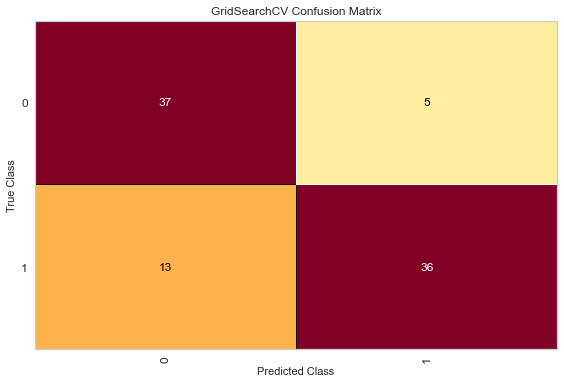

<AxesSubplot:title={'center':'GridSearchCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
cm = ConfusionMatrix(cv)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [69]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        42
           1       0.88      0.73      0.80        49

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91

